# Project - Airline Sentiment Analysis

# Importing Libraries

In [410]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
import string
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 

# Importing Dataset

In [412]:
dataset = pd.read_csv('train.csv')[0:4000]

In [413]:
dataset.head()

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567900433542488064,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada)
1,569989168903819264,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,568089179520954368,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)
3,568928195581513728,negative,Southwest,NaN,amccarthy19,NaN,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,NaN,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada)
4,568594180014014464,negative,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada)


In [414]:
text = dataset['text'].values
text=[word_tokenize(doc) for doc in text]
sentiment=dataset['airline_sentiment'].values

In [415]:
#print(all_documents_modified[0])

In [416]:
documents = [(text[i] , sentiment[i]) for i in range(4000)]

In [417]:
documents[0]

(['@',
  'SouthwestAir',
  'I',
  'am',
  'scheduled',
  'for',
  'the',
  'morning',
  ',',
  '2',
  'days',
  'after',
  'the',
  'fact',
  ',',
  'yes..not',
  'sure',
  'why',
  'my',
  'evening',
  'flight',
  'was',
  'the',
  'only',
  'one',
  'Cancelled',
  'Flightled'],
 'negative')

# Cleaning Dataset (TOKENIZING, LEMMATIZING, (REMOVING STOPWORDS, PUNCTUATIONS) )

In [418]:
lemmatizer = WordNetLemmatizer()

In [419]:
from nltk.corpus import wordnet
def get_simple_pos(tag):
    
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [420]:
stops = set(stopwords.words('english'))
punctuations = list(string.punctuation)
stops.update(punctuations)
stops, string.punctuation

({'!',
  '"',
  '#',
  '$',
  '%',
  '&',
  "'",
  '(',
  ')',
  '*',
  '+',
  ',',
  '-',
  '.',
  '/',
  ':',
  ';',
  '<',
  '=',
  '>',
  '?',
  '@',
  '[',
  '\\',
  ']',
  '^',
  '_',
  '`',
  'a',
  'about',
  'above',
  'after',
  'again',
  'against',
  'ain',
  'all',
  'am',
  'an',
  'and',
  'any',
  'are',
  'aren',
  "aren't",
  'as',
  'at',
  'be',
  'because',
  'been',
  'before',
  'being',
  'below',
  'between',
  'both',
  'but',
  'by',
  'can',
  'couldn',
  "couldn't",
  'd',
  'did',
  'didn',
  "didn't",
  'do',
  'does',
  'doesn',
  "doesn't",
  'doing',
  'don',
  "don't",
  'down',
  'during',
  'each',
  'few',
  'for',
  'from',
  'further',
  'had',
  'hadn',
  "hadn't",
  'has',
  'hasn',
  "hasn't",
  'have',
  'haven',
  "haven't",
  'having',
  'he',
  'her',
  'here',
  'hers',
  'herself',
  'him',
  'himself',
  'his',
  'how',
  'i',
  'if',
  'in',
  'into',
  'is',
  'isn',
  "isn't",
  'it',
  "it's",
  'its',
  'itself',
  'just',
  'll',


In [421]:
def clean_review(words):
    output_words = []
    for w in words:
        if w.lower() not in stops:
            pos = pos_tag([w])
            clean_word = lemmatizer.lemmatize(w, pos = get_simple_pos(pos[0][1]))
            output_words.append(clean_word.lower())
    return output_words

In [422]:
document = [(clean_review(doc), category) for doc, category in documents]

In [451]:
for i in document:
    print(i)

(['southwestair', 'schedule', 'morning', '2', 'day', 'fact', 'yes..not', 'sure', 'even', 'flight', 'one', 'cancelled', 'flightled'], 'negative')
(['southwestair', 'see', 'worker', 'time', 'time', 'go', 'beyond', 'love', 'fly', 'guy', 'thank'], 'positive')
(['united', 'flew', 'ord', 'miami', 'back', 'great', 'crew', 'service', 'leg', 'thanks'], 'positive')
(['southwestair', 'dultch97', "'s", 'horse', 'radish', '😤🐴'], 'negative')
(['united', 'flight', 'ord', 'delayed', 'air', 'force', 'one', 'last', 'flight', 'sbn', '8:20', '5', 'min', 'land'], 'negative')
(['united', 'load', 'u', 'fly', 'sardine', 'knew', 'pilot', '2', 'hour', 'late', 'flight', 'incompetent', 'beyond', 'belief'], 'negative')
(['jetblue', 'stock', 'response', 'delays', 'frustrate', 'poor', 'cust', 'serv', 'amp', 'told', '3', 'ppl', 'wait', 'amp', "'d", 'come', 'back'], 'negative')
(['jetblue', "'d", 'nice', 'hoping', 'rack', 'enough', 'mile', 'take', 'trip', 'seattle', 'enjoy', 'perfect', 'latte', 'city', 'coffee'], 'pos

(['usairways', 'hey', 'book', 'flight', 'isabelle', 'gramp', 'boston', 'lax', 'say', 'charge', 'credit', 'card', 'transaction', "n't", 'go'], 'negative')
(['southwestair', "'ll", 'stick', 'fly', 'free', 'southwest', 'go', 'son', 'work', 'wonderful', 'company', 'moms', 'fly', 'free'], 'positive')
(['united', 'yes', 'lusaka', 'zambia', 'guess', 'bag', 'never', 'make', 'plane', 'iad'], 'negative')
(['jetblue', 'thanks'], 'positive')
(['usairways', 'call', '3x', 'amp', 'say', 'high', 'call', 'volume', 'call', 'back', '1', 'minute', 'international', 'call', 'way', 'someone', 'contact'], 'negative')
(['united', 'mobile', 'apps', 'need', 'construction', 'ground', 'os', 'category', "'s", 'expensive', 'get', 'right'], 'negative')
(['usairways', 'americanair', 'go', 'miss', 'us', 'airways', 'always', 'provide', 'great', 'service', 'never', 'let'], 'positive')
(['united', 'happen', 'afternoon', 'huge', 'amt', 'incoming', 'plane', 'sfo', 'delayed', '1-2', 'hour', 'frustrating'], 'negative')
(['sou

(['usairways', 'really', 'u', 'give', '6', 'scotch', 'rock', 'control', 'drunk', 'would', 'let', 'sister', 'change', 'seat', 'group'], 'negative')
(['jetblue', 'understand', 'everyone', 'say', 'different', 'thing', 'flight', 'late', 'flightr', 'night', 'one', 'u', 'get', 'take'], 'negative')
(['jetblue', 'finally', 'finally'], 'neutral')
(['jetblue', 'flight', '2302', 'jfk', 'buf'], 'neutral')
(['united', 'nice', 'know', '3', 'hour', 'time', 'worth', '7.99', 'free', 'directtv', 'everyone', 'ever', 'hear', 'preventative', 'maintenance'], 'negative')
(['jetblue', 'say', 'update', "n't", 'work', "n't", 'get', 'paid', 'jet', 'blue', 'money', 'flight', 'argh'], 'negative')
(['southwestair', 'could', "n't", 'fly', 'today', 'amp', 'make', 'trip', 'harder', 'pay', 'checked', 'bag', 'devotedyyours', 'today'], 'negative')
(['usairways', 'priorities', 'make', 'considering', 'pending', 'snow', 'storm', 'delay', 'flight', 'hour', 'amp', 'half', "'d", 'like', 'answer'], 'negative')
(['southwestair',

(['southwestair', 'flight', '1700', 'phx', 'lax', 'wheels', 'stop', 'glad', 'home', 'thanks', 'professional', 'front', 'cabin'], 'positive')
(['united', 'money', 'suck', 'airline', 'terrible', 'terrible', 'customer', 'service'], 'negative')
(['usairways', 'flight', '680', 'look', "'m", 'hearing', 'cancelled', 'flightled', 'departure', 'reagan_airport', "'m", 'head'], 'neutral')
(['united', 'unless', "'s", 'guy', 'im', 'good'], 'negative')
(['southwestair', 'discount', 'every', 'tuesday', 'cause', 'im', 'leave', 'fron', 'birmingham', 'airport', 'san', 'fran', 'next', 'week', 'march', 'sometime'], 'neutral')
(['united', 'states', 'faundation', 'faith', 'judeo', 'cristian', 'ideologias', 'http', '//t.co/mwbk68k0a3'], 'neutral')
(['united', 'thanks'], 'neutral')
(['usairways', 'year', 'ago', 'lose', '50,000', 'mile', 'bc', 'physically', 'unable', 'fly', 'period', 'submit', 'doctor', "'s", 'note'], 'negative')
(['americanair', 'order', 'always', '9hour', 'flight', 'delayed', '4', 'hour', 'b

(['americanair', 'reservation', 'system', 'wo', "n't", 'even', 'let', 'u', 'leave', 'phone', 'way', 'fix', 'rebooked', 'wrong', 'day'], 'negative')
(['virginamerica', 'ladygaga', 'carrieunderwood', 'julie', 'andrews', 'way', 'though', 'ladygaga', 'impressive', 'carrieunderwood'], 'positive')
(['americanair', 'basically', 'u', 'right', 'http', '//t.co/in24bpb7dw'], 'neutral')
(['united', '...', 'want', 'bag', 'flight', '1142'], 'negative')
(['southwestair', 'groupa', 'group', 'c.', 'never', 'get', 'sit', 'next', 'south', 'west', 'flight', 'even', 'honey', 'moon'], 'negative')
(['usairways', 'livery', 'back', 'day', 'http', '//t.co/eeqwvammiy'], 'neutral')
(['usairways', 'brother', 'brizzyberg27', 'miss', 'flight', 'travel', 'home', 'funeral', 'ca', "n't", 'get', 'call', 'center', 'help'], 'negative')
(['united', 'think', 'dm', 'would', 'well'], 'negative')
(['united', 'perhaps', 'could', 'fix', 'http', '//t.co/72rmpkogwu', 'http', '//t.co/901hlngbtx', 'answerthis'], 'negative')
(['unite

In [423]:
from sklearn.feature_extraction.text import CountVectorizer

In [424]:
categories = [category for document, category in documents]

In [425]:
text_documents = [" ".join(document) for document, category in documents]

# SPLITTING THE DATASET INTO TRAINING AND TESTING

In [426]:
from sklearn.model_selection import train_test_split

In [427]:
x_train, x_test, y_train, y_test = train_test_split(text_documents, categories)

In [428]:
#count_vec = CountVectorizer(max_features = 5000)
#x_train_features = count_vec.fit_transform(x_train)
#x_test_features = count_vec.transform(x_test)

# Vectorization TO GET MAXIMUM FREQUENCY WORDS

In [429]:
count_vect=TfidfVectorizer(max_features=5000, max_df=0.8, min_df=0.001)
x_train_features=count_vect.fit_transform(x_train)
x_test_features=count_vect.transform(x_test)


# USING SVM CLASSIFIER

In [430]:
clf = SVC()
clf.fit(x_train_features,y_train)
ypred1 = clf.predict(x_test_features) 
clf.score(x_test_features, y_test)

0.76

# USING RANDOM FOREST CLASSIFIER 

In [431]:
clf1=RandomForestClassifier(n_estimators=2000, n_jobs=-1)
clf1.fit(x_train_features, y_train)
ypred2 = clf1.predict(x_test_features) 
clf1.score(x_test_features,y_test)

0.722

# USING MUlTINOMIAL NAIVE BAYES CLASSIFIER

In [432]:
clf2=MultinomialNB()
clf2.fit(x_train_features, y_train)
ypred3 = clf2.predict(x_test_features) 

clf2.score(x_test_features, y_test)

0.701

# NAIVE BAYES APPROACH (CODE FROM SCRATCH)

In [433]:
le = preprocessing.LabelEncoder()
new_y_train = le.fit_transform(y_train)
new_y_test = le.fit_transform(y_test)

In [434]:
features = count_vect.get_feature_names()[20:2000]

In [435]:
def data_modifier(x_data, features):
    modified_data=np.zeros((len(x_data), len(features)))
    for i in range(len(x_data)):
        current_doc=x_data[i]
        d=dict()
        for word in current_doc:
            if word in d.keys():
                d[word]+=1
            else:
                d[word]=1
        for j in range(len(features)):
            if features[j] in d.keys():
                modified_data[i][j]=d[features[j]]
            else:
                continue
    return modified_data 

In [436]:
x_train_new=[word_tokenize(doc) for doc in x_train]
x_test_new=[word_tokenize(doc) for doc in x_test]


In [437]:
x_train_modified = data_modifier(x_train_new , features)
x_test_modified = data_modifier(x_test_new , features)

In [438]:

def fit(x_train, y_train):
    count=dict()
    for i in range(20):
        needed_docs=x_train[y_train==i]
        count[i]=dict()
        count[i]['total']=0
        for j in range(len(features)):
            count[i][features[j]]=needed_docs[:, j].sum()
            count[i]['total']+=count[i][features[j]]        
    return count

In [439]:
def probability(dictionary, x, current_class):
    probas_for_each_word=[]
    
    for i in range(len(x)):
        if x[i]!=0:
        
            numerator=dictionary[current_class][features[i]]
            denominator=dictionary[current_class]['total']
            proba=np.log((numerator+1)/(denominator+len(x)))
            probas_for_each_word.append(proba)
    return sum(probas_for_each_word)


In [440]:
def predict_single(dic, x):
    classes = dictionary.keys()
    best_p = -1000
    best_class = -1
    first_run = True
    for current_class in classes:
        p_current_class = probability(dic, x, current_class)
        if (first_run or p_current_class > best_p):
            best_p = p_current_class
            best_class = current_class
        first_run = False
    return best_class

In [441]:
def predict(x_test, dic):
    y_pred=[]
    for doc in x_test:
        y_pred.append(predict_single(dic, doc))
    return y_pred

In [442]:
dictionary=fit(x_train_modified, new_y_train)


In [443]:
y_predicted=predict(x_test_modified, dictionary)


In [444]:
from sklearn.metrics import classification_report
print(classification_report(y_true=new_y_test, y_pred=y_predicted))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       627
           1       0.81      0.15      0.26       220
           2       0.93      0.16      0.28       153

    accuracy                           0.69      1000
   macro avg       0.80      0.44      0.45      1000
weighted avg       0.74      0.69      0.60      1000



From this we can say that our classifier is working good as the difference between their accuracy is very less

# COMBINING OUR 2 CLASSIFIER AND CHECKING THE ACCURACY

In [445]:
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators=[('MNB', MultinomialNB()), ('SVC',SVC(probability=True))], voting='soft').fit(x_train_features,y_train)


In [446]:
ypred4 = ensemble.predict(x_test_features)

In [447]:
print('The accuracy for MNB and SVC is:',ensemble.score(x_test_features,y_test))

The accuracy for MNB and SVC is: 0.773


FROM THIS WE CAN SAY COMBINING THE CLASSIFIER CAN INCREASE THE ACCURACY

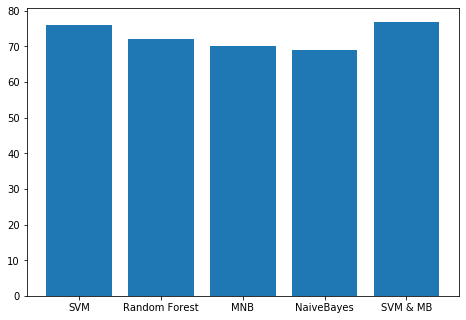

In [449]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['SVM', 'Random Forest', 'MNB', 'NaiveBayes', 'SVM & MB']
students = [76,72,70,69 ,77]
ax.bar(langs,students)
plt.show()